# 第01周作业：Ames房价数据探索2 Data Explore
根据房屋的特征来预测亚美尼亚州洛瓦市（Ames，Lowa）的房价。
其中房屋的特征 x 共有 79 维，响应值 y 为每个房屋的销售价格（SalePrice）。 
评价标准为预测值的对数和观测值的对数的 RMSE(Root-Mean-Squared-Error )。

## 这里读取的是数据探索1 处理之后的数据
## 代码版本 Python3

In [1]:
# 导入必要的工具包
import numpy as np #用于数值计算
import pandas as pd #用于数据表处理，数据文件读写

import matplotlib.pyplot as plt #用于绘图：分析结果的可视化。
import seaborn as sns #用于绘图：分析结果的可视化。封装更好。
from IPython.display import display

#应该是设置浮点数的形式格式，小数点后三位
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#这一行是干嘛的？ 设置 matplotlib 让绘制的图形出现在 Notebook 里而不是新窗口
%matplotlib inline

#读取训练数据: 特征工程之后的
dpath = './data/'
data = pd.read_csv(dpath + 'AmesHouse_FE_DE1_train.csv')
data.head(6) #查看数据的前几行，默认是 5 

,LotFrontage,LotArea,Alley,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,...,KitchenScore,FireplaceScore,GarageScore,TotalBath,AllSF,AllFlrsSF,AllPorchSF,HasMasVnr,BoughtOffPlan,SalePrice
0,0.227,-0.203,-0.243,0.701,0.226,1.054,0.881,0.534,0.950,-0.073,...,0.936,-0.952,0.307,1.665,0.012,0.426,-0.246,1.220,-0.304,208500
1,0.670,-0.086,-0.243,0.701,0.226,0.159,-0.427,-0.574,0.950,-0.073,...,-1.002,0.610,-0.081,0.380,-0.044,-0.485,-0.828,-0.820,-0.304,181500
2,0.316,0.081,-0.243,-1.029,0.226,0.988,0.832,0.342,0.950,-0.073,...,0.936,0.610,0.571,1.665,0.196,0.580,-0.427,1.220,-0.304,223500
3,0.080,-0.091,-0.243,-1.029,0.226,-1.861,-0.718,-0.574,-0.875,3.715,...,0.936,0.610,0.720,-0.263,-0.111,0.440,2.101,-0.820,-0.304,140000
4,0.789,0.387,-0.243,-1.029,0.226,0.954,0.735,1.404,0.950,-0.073,...,0.936,0.610,1.574,1.665,1.034,1.418,-0.026,1.220,-0.304,250000
5,0.818,0.372,-0.243,-1.029,0.226,0.723,0.493,-0.574,0.950,-0.073,...,-1.002,-0.952,0.007,0.380,-0.525,-0.282,2.511,-0.820,-0.304,143000


## 两两特征之间的相关性

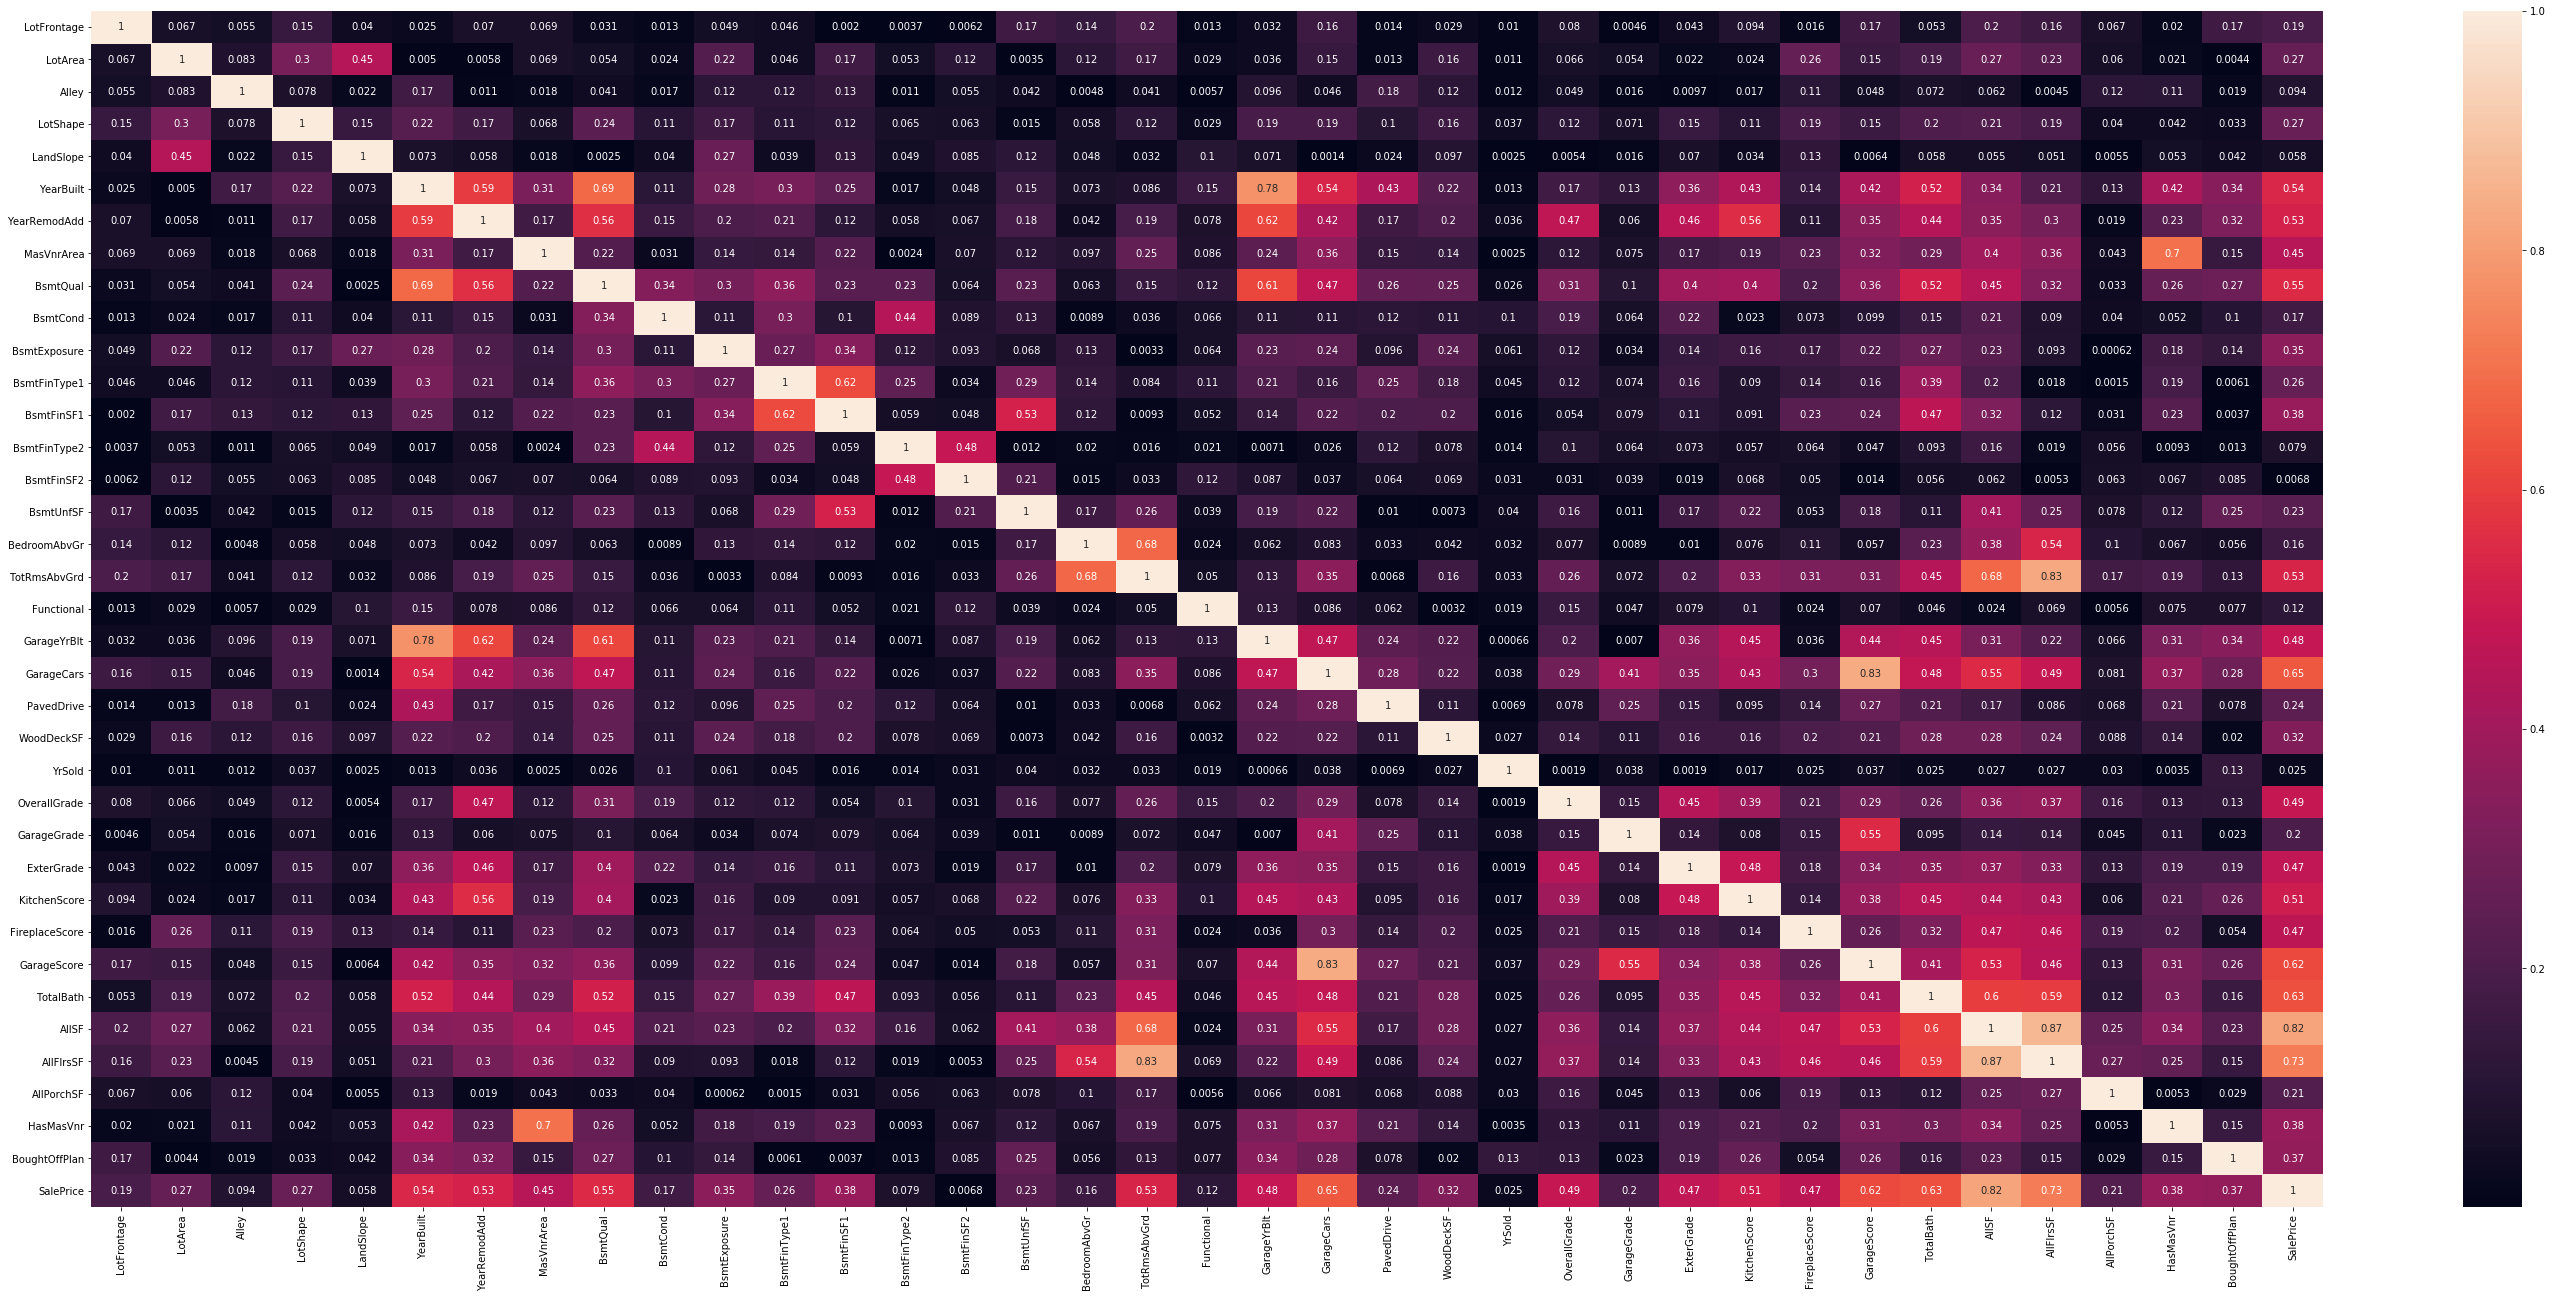

In [4]:
#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = data.corr().abs()

plt.subplots(figsize=(50, 22))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig(dpath + 'house_coor_DE2.png' )
plt.show()

In [ ]:
把与房价的相关性低于 0.100 的属性去掉